In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from recommendations import critics

### Отыскание похожих пользователей

#### По евклидову расстоянию

Расстояние, вычисленное по формуле $\sqrt{a^2+b^2}$ тем меньше, чем больще сходство между людьми. Но нам нужна функция, значения которой тем больше, чем более похожи люди друг на друга. Поэтому возьмем функцию $\frac{1}{1+\sqrt{a^2+b^2}}$

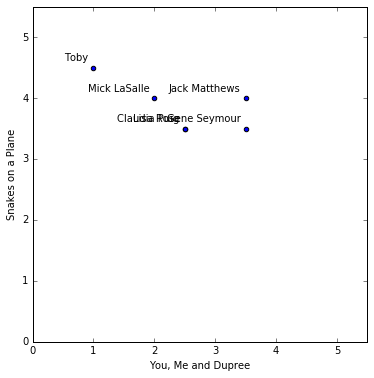

In [57]:
def show_film_to_film_scatter(prefs, x_film, y_film):
    x_dict = dict(
        [(p, prefs[p][x_film]) for p in prefs if x_film in prefs[p]])
    y_dict = dict(
        [(p, prefs[p][y_film]) for p in prefs if y_film in prefs[p]])
    keys_x = set(x_dict.keys())
    keys_y = set(y_dict.keys())
    intersection = keys_x & keys_y
    
    plt.figure(figsize=(6, 6))
    for key in intersection:
        x, y = x_dict[key], y_dict[key]
        plt.scatter(x, y)
        plt.annotate(key, xy = (x, y),xytext = (-5, 5),
            textcoords = 'offset points', ha = 'right', va = 'bottom')

    plt.xlabel(x_film)
    plt.ylabel(y_film)
    plt.xlim(0, 5.5)
    plt.ylim(0, 5.5)
    plt.show()

show_film_to_film_scatter(critics, 
                          'You, Me and Dupree', 'Snakes on a Plane')

In [22]:
from math import sqrt

#Возвращает оценку подобия person1 и person2 на основе евклидова расстояния
def sim_distance(prefs, p1, p2):
    #получить список предметов, оцененных обоими
    si = [pow(prefs[p1][item] - prefs[p2][item], 2) 
          for item in prefs[p1] if item in prefs[p2]]
    #если нет ни одной общей оценки, то возвращаем 0
    if len(si) == 0: return 0
    return 1 / (1 + sqrt(sum(si)))
        

In [23]:
sim_distance(critics, 'Michael Phillips', 'Toby')

0.38742588672279304

#### Коэффициент корреляции Пирсона

Коэффициент корреляции - мера того, как хорошо два набора данных ложатся на одну прямую (мера линейной зависимости). Он дает лучшие результаты в случае, если данные плохо нормализованы, например, когда один критик стабильно выставляет более низкие оценки

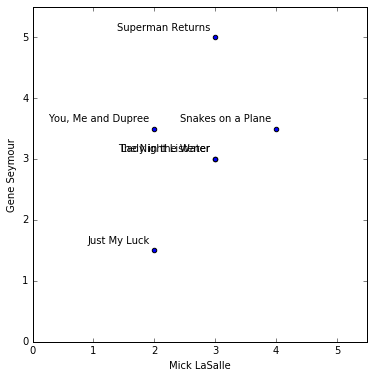

In [56]:
def show_person_to_person_scatter(prefs, px, py):
    x_dict = prefs[px]
    y_dict = prefs[py]
    keys_x = set(x_dict.keys())
    keys_y = set(y_dict.keys())
    intersection = keys_x & keys_y
    
    plt.figure(figsize=(6, 6))
    for key in intersection:
        x, y = x_dict[key], y_dict[key]
        plt.scatter(x, y)
        plt.annotate(key, xy = (x, y), xytext = (-5, 5),
            textcoords = 'offset points', ha = 'right', va = 'bottom')

    plt.xlabel(px)
    plt.ylabel(py)
    plt.xlim(0, 5.5)
    plt.ylim(0, 5.5)
    plt.show()
    
show_person_to_person_scatter(critics, 'Mick LaSalle', 'Gene Seymour')

$$r_{XY} = \frac{cov(X, Y)}{\sqrt{D[X]*D[Y]}} 
= \frac{E[XY] - E[X] * E[Y]}{\sqrt{(E[X^2]-E^2[X])*(E[Y^2]-E^2[Y])}} 
= \frac{\frac{\sum{X_i*Y_i}}{n} - \frac{\sum{X_i}*\sum{Y_i}}{n^2}}
{\sqrt{
    (\frac{\sum{X^2_i}}{n} - \frac{(\sum{X_i})^2}{n^2}) * 
    (\frac{\sum{Y^2_i}}{n} - \frac{(\sum{Y_i})^2}{n^2})
}}
= \frac
    {\frac{1}{n} * (\sum{X_i*Y_i} - \frac{\sum{X_i}*\sum{Y_i}}{n})}
    {
        \frac{1}{n} * \sqrt{
            (\sum{X^2_i} - \frac{(\sum{X_i})^2}{n}) * 
            (\sum{Y^2_i} - \frac{(\sum{Y_i})^2}{n})
        }
    }
= \frac
    {\sum{X_i*Y_i} - \frac{\sum{X_i}*\sum{Y_i}}{n}}
    {\sqrt{
        (\sum{X^2_i} - \frac{(\sum{X_i})^2}{n}) * 
        (\sum{Y^2_i} - \frac{(\sum{Y_i})^2}{n})
    }}
$$

In [76]:
import numpy as np

#возвращает коэффициент корелляции Пирсона между критиками p1 и p2
def sim_pearson(prefs, p1, p2):
    si = dict([(item, 1) for item in prefs[p1] if item in prefs[p2]])
    n = len (si)
    if n == 0: return 0
    v1 = np.array([prefs[p1][it] for it in si])
    v2 = np.array([prefs[p2][it] for it in si])
    norm1 = v1 - v1.mean()
    norm2 = v2 - v2.mean()
    num = norm1.dot(norm2)
    den = sqrt(norm1.dot(norm1) * norm2.dot(norm2))
    if den == 0: return 0
    return num / den

In [77]:
sim_pearson(critics, 'Lisa Rose', 'Gene Seymour')

0.39605901719066977